## Assignment11_LastName_FirstName 
## Due date: Friday, April 9 at 11:59pm

###  Use the following format for homework filename:  

`Assignment11_LastName_FirstName.ipynb`


#### - This assignment is worth 21 points.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.integrate as spqd
%matplotlib inline

**Problem 1** (1pt)

Watch the Lecture on Lagrange Interpolation and complete Problem 1 assigned in the video. 

You must show your work to get full credit.


*Solution to Problem 1:*

**Problem 2** (1pt)

Watch the Lecture on `Lagrange Interpolation` and complete Problem 2 assigned in the video

*Solution to Problem 2:*

**Problem 3** (6 pts): 

Let $K$ be the maximum value of $\left \lvert f^{(4)}(x)\right\rvert$ on an interval $[a,b]$, then the error bound for Simpson method $E_S$ is: 

$$E_S = \left\lvert \int_a^b f(x) \ dx - S_n  \right\rvert \leq \frac{(b-a)^5 K }{180 \ n^4}$$

Let $f(x) = \cos(x-x^2)$, 

(a) Write down an expression for $f^{(4)}(x)$ (you are **not** required to show work).  Note that $f^{(4)}(x)$ represents the fourth derivative of the function $f(x)$.

(b) Write a program to compute the maximum value of $\left \lvert f^{(4)}(x)\right\rvert$ on the interval $[0,1]$. What is the maximum value?

(c) How large must the value of $n$ be in the approximation $S_n$ of $\int_0^1 f(x) \ dx$ by Simpson's rule to ensure that the absolute error is less than $10^{-4}$?

(d) Write a program to compute the integral $\int_0^1 f(x) \ dx$  using Simpson's method with the value of $n$ obtained in part (c).

(e) Write down the exact solution for $\int_0^1 f(x) \ dx$ (you don't need to show work for how you computed the exact integral).

(f) Compare the exact solution from part (d) to the computed solution from part (c). Does it agree with your estimates in part (c)? 



$-12(1-2x)^2 sin(x-x^2) + (1-2x)^4 cos(x(x-1))-12cos(x(x-1))$

In [21]:
def f3d(x):
    return -12*(1-2*x)*2*np.sin(x-x**2)+(1-2*x)*4*np.cos(x**2-x)-12*np.cos(x**2-x)
def findmax(f,a,b):
    xs = np.linspace(a,b,50)
    maxval = -1000000.
    for i in xs:
        y = f(i)
        if y > maxval:
            maxval = y
    return maxval

In [22]:
print(findmax(f3d,0,1))

-8.0


5

In [24]:
def simpson(a,b,N,f):
    Nint = int(2*N) # This makes N even incase some one enters an odd value for N
    xs = np.linspace(a,b,Nint+1)
    ys = f(xs)
    dx = (b-a)/Nint
    return dx/3.*(ys[0] + ys[Nint] + 2.*np.sum(ys[2:Nint-1:2]) + 4.*np.sum(ys[1:Nint:2])) 
def f3(x):
    return np.cos(x-x**2)

In [63]:
simpson(0,1,5,f3)

0.9833926633880781

In [6]:
.983399

yes it agrees. .983392 is less than 10^-4 away from .983399

**Problem 4** (2pts)

Write a program to find the first ten positive values of $x$ for which 

$$
x = \tan(x).
$$

Use one of the root finding methods studied in this course to solve the problem. 

In [8]:
# Solution for Problem 4


**Problem 5** (2pts)

Since the area of the unit circle is $A = \pi$ , it follows that
$$
\frac{\pi}{2} = \int_{-1}^1 \sqrt{1-x^2} dx.
$$

Therefore we can approximate $\pi$ by approximating this integral.

Write a program that uses Trapezoid's Method to compute approximate values of $\pi$ in this way. Show results for $\Delta x$ = 1, 1/2, 1/4 and 1/8 and  comment on your results.


In [16]:
# Solution for Problem 5
def trapazoid(f, a, b, n):
    h = float(b - a) / n
    s = 0.0
    s += f(a)/2.0
    for i in range(1, n):
        s += f(a + i*h)
    s += f(b)/2.0
    return s * h
print(2*trapazoid(lambda x:np.sqrt(1-x**2),-1,1,2))
print(2*trapazoid(lambda x:np.sqrt(1-x**2),-1,1,4))
print(2*trapazoid(lambda x:np.sqrt(1-x**2),-1,1,8))
print(2*trapazoid(lambda x:np.sqrt(1-x**2),-1,1,16))
print('using step 200 to approximate close to real value:',2*trapazoid(lambda x:np.sqrt(1-x**2),-1,1,200))

2.0
2.732050807568877
2.9957090681024403
3.0898191443571745
using step 200 to approximate close to real value: 3.140417031779046


**Problem 6** (2pts)

Repeat Problem 5 but use **Simpson Method** instead of Trapezoid Method. See Lecture 10 and the recommended Calculus text in the Syllabus for material on Simpson Method.

In [11]:
# Solution for Problem 6
def simpson(a,b,N,f):
    Nint = int(2*N) # This makes N even incase some one enters an odd value for N
    xs = np.linspace(a,b,Nint+1)
    ys = f(xs)
    dx = (b-a)/Nint
    return dx/3*(ys[0] + ys[Nint] + 2.*np.sum(ys[2:Nint-1:2]) + 4.*np.sum(ys[1:Nint:2])) 

In [15]:
print(2*simpson(-1,1,2,lambda x:np.sqrt(1-x**2)))
print(2*simpson(-1,1,4,lambda x:np.sqrt(1-x**2)))
print(2*simpson(-1,1,8,lambda x:np.sqrt(1-x**2)))
print(2*simpson(-1,1,16,lambda x:np.sqrt(1-x**2)))
print('using step 200 to approximate close to real value:',2*simpson(-1,1,200,lambda x:np.sqrt(1-x**2)))

2.9760677434251694
3.0835951549469613
3.121189169775418
3.1343976689845974
using step 200 to approximate close to real value: 3.1414302491930206


**Problem 7** (4pts)

Watch the Lecture on `Lagrange Interpolation-Part 2` and complete the following problem using Python programming.

Assuming that $f(x)$ is given as follows:
$$
f(x) = \frac{7x}{2x^{2} + 1}, ~ -1 \leq x \leq 1
$$

[a.]  Using an `equispaced` set of $25$ nodes, generate the Lagrange interpolating polynomial to $f(x)$ and use it to interpolate `x = np.linspace(-1,1,2000)`. 

Generate a plot which shows how the error in your approximation varies over the interval $[-1,1]$ as presented in the video.

[b.]  What is the degree of the Lagrange interpolating polynomial in part (a).

[c.]  Compare the graph of f(x) with that of the of the Lagrange interpolating polynomial from part (a) for `x = np.linspace(-1,1,2000)` by plotting both graphs on the same figure.

[d.]  Using an equispaced set of $250$ nodes, generate the Lagrange interpolating polynomial to $f(x)$ and use it to interpolate `x = np.linspace(-1,1,2000)`.  
Generate a plot which shows how the error in your approximation varies over the interval.  

[e.]  What is the degree of the Lagrange interpolating polynomial in part (d).

[f.]  Compare the graph of f(x) with that of the Lagrange interpolating polynomial from (d) for `x = np.linspace(-1,1,2000)` by plotting both graphs on the same figure.

In [25]:
def lfun(xvals,jj,x):
    lval = np.ones(x.size)
    # Insert code here
    n = xvals.size
    for l in range(0,n):
        if l != jj:
            lval *= (x-xvals[l])/(xvals[jj]-xvals[l])  

    return lval

def lagran_interp(xvals,fvals,x):
    n = fvals.size
    # Insert code here 
    ipoly = np.zeros(x.size)
    for jj in range(0,n):
        ipoly += fvals[jj]*lfun(xvals,jj,x)
   
    return ipoly

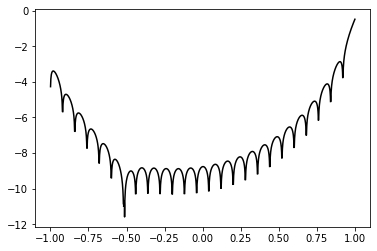

In [53]:
x=np.linspace(-1,1,2000)
fun=(7*x)/(2*(x**2)+1)
xvals=x[::80]
yvals=fun[::80]
finterp = lagran_interp(xvals,yvals,x)
plt.plot(x,np.ma.log10(np.abs(fun-finterp)),ls='-',color='k')

24

In [36]:
def function1(x):
    return (7*x)/(2*(x**2)+1)

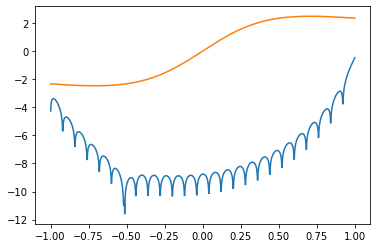

In [40]:
y=[]
for i in x:
    y.append(function1(i))
plt.plot(x,np.ma.log10(np.abs(fun-finterp)))
plt.plot(x,y)

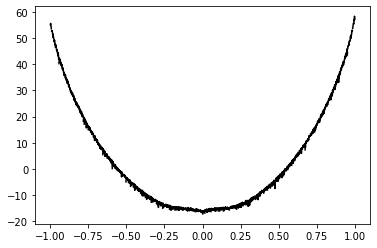

In [43]:
# Solution for Problem (d)
xvals=x[::8]
yvals=fun[::8]
finterp = lagran_interp(xvals,yvals,x)
plt.plot(x,np.ma.log10(np.abs(fun-finterp)),ls='-',color='k')

249

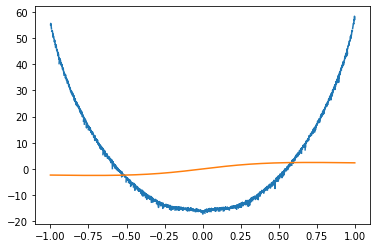

In [44]:
# Solution for Problem (f)
plt.plot(x,np.ma.log10(np.abs(fun-finterp)))
plt.plot(x,y)

**Problem 8** (3pts)

Watch the Lecture on `Lagrange Interpolation-Part 2` and complete the following problem using Python programming.

Assuming that $f(x)$ is given as follows:
$$
f(x) = \frac{7x}{2x^{2} + 1}, ~ -1 \leq x \leq 1
$$

[a.]  Using `non-equispaced` set of $25$ nodes, generate the Lagrange interpolating polynomial to $f(x)$ and use it to interpolate `x = np.linspace(-1,1,2000)`. 

Generate a plot which shows how the error in your approximation varies over the interval $[-1,1]$ as presented in the video.

[b.]  Compare the graph of f(x) with that of the Lagrange interpolating polynomial from (a) for `x = np.linspace(-1,1,2000)` by plotting both graphs on the same figure.

[c.]  Using `non-equispaced` set of $250$ nodes, generate the Lagrange interpolating polynomial to $f(x)$ and use it to interpolate `x = np.linspace(-1,1,2000)`.  
Generate a plot which shows how the error in your approximation varies over the interval.  

[d.]  Compare the graph of $f(x)$ with that of the Lagrange interpolating polynomial from (c) for `x = np.linspace(-1,1,2000)` by plotting both graphs on the same figure.

[e.]  Compare your results from Problem 2 to Problem 1. Explain your findings.

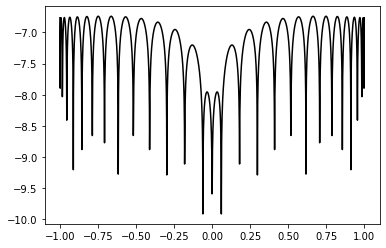

In [55]:
ncheb = 25
xcheb=np.zeros(ncheb+1)
for jj in range(0,ncheb+1):
    xcheb[jj] = np.cos((2.*jj+1.)/(2.*ncheb+2.)*np.pi)
fcheb = (7*xcheb)/(2*(xcheb**2)+1)
finterp = lagran_interp(xcheb,fcheb,x)
plt.plot(x,np.ma.log10(np.abs(fun-finterp)),ls='-',color='k')

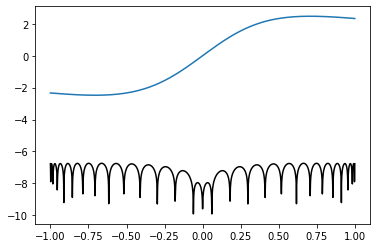

In [49]:
# Solution for Problem (b)
plt.plot(x,y)
plt.plot(x,np.ma.log10(np.abs(fun-finterp)),ls='-',color='k')

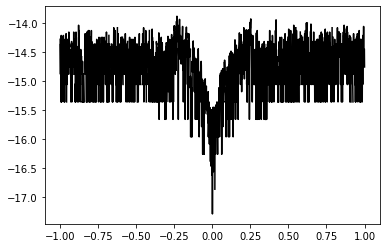

In [50]:
# Solution for Problem (c)
ncheb = 250
xcheb=np.zeros(ncheb+1)
for jj in range(0,ncheb+1):
    xcheb[jj] = np.cos((2.*jj+1.)/(2.*ncheb+2.)*np.pi)
fcheb = (7*xcheb)/(2*(xcheb**2)+1)
finterp = lagran_interp(xcheb,fcheb,x)
plt.plot(x,np.ma.log10(np.abs(fun-finterp)),ls='-',color='k')

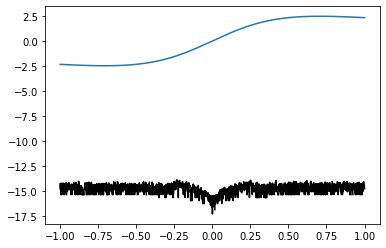

In [51]:
# Solution for Problem (d)
plt.plot(x,y)
plt.plot(x,np.ma.log10(np.abs(fun-finterp)),ls='-',color='k')

there are many more points, and also they are lower on the yaxis